In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
X=pd.DataFrame(data=data.data,columns=data.feature_names)

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y=pd.DataFrame(data=data.target)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [6]:
X.shape

(569, 30)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=30))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
callback = EarlyStopping(
    monitor="accuracy",
    min_delta=0.00001,
    patience=25,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
print(model.summary())
history1 = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),batch_size=128,epochs=100,callbacks=callback)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 [==============================] - 2s 125ms/step - loss: 0.7460 - accuracy: 0.4330 - val_loss: 0.7102 - val_accuracy: 0.5702
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6395 - accuracy: 0.6198 - val_loss: 0.6253 - val_accuracy: 0.6930
Epoch 3/100
4/4 [===============

In [10]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=30))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())
history3 = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),batch_size=128,epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                992       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 [==============================] - 1s 66ms/step - loss: 0.5566 - accuracy: 0.7495 - val_loss: 0.5062 - val_accuracy: 0.8070
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4746 - accuracy: 0.8286 - val_loss: 0.4314 - val_accuracy: 0.8421
Epoch 3/100
4/4 [==============

In [11]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
callback = EarlyStopping(
    monitor="accuracy",
    min_delta=0.00001,
    patience=25,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
print(model.summary())
history2 = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),batch_size=128,epochs=100,callbacks=callback)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                992       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 [==============================] - 1s 73ms/step - loss: 0.9571 - accuracy: 0.3714 - val_loss: 0.8521 - val_accuracy: 0.4211
Epoch 2/100
4/4 [======================

In [12]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())
history4 = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),batch_size=128,epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                992       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 [==============================] - 1s 68ms/step - loss: 0.6500 - accuracy: 0.6549 - val_loss: 0.6049 - val_accuracy: 0.8070
Epoch 2/100
4/4 [======================

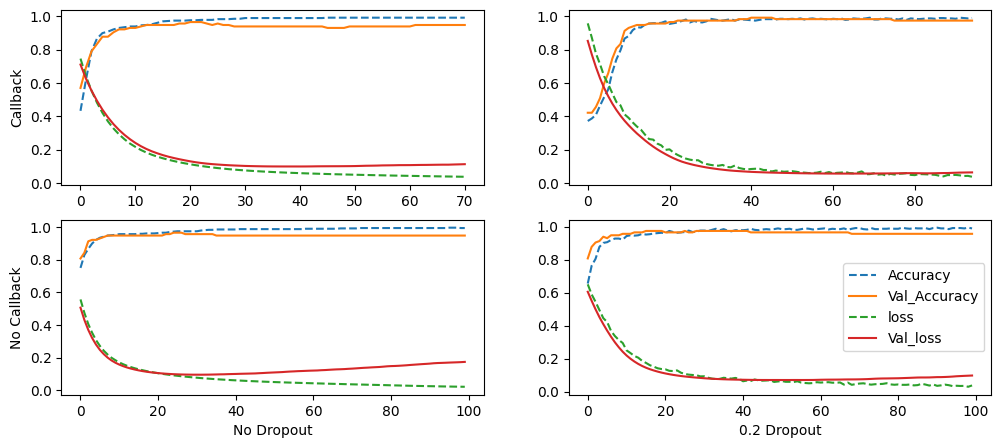

In [13]:

f=plt.figure()
f.set_figheight(5)
f.set_figwidth(12)
plt.subplot(2, 2, 1)
plt.plot(history1.history['accuracy'],label='Accuracy',linestyle='--')
plt.plot(history1.history['val_accuracy'],label='Val_Accuracy')
plt.plot(history1.history['loss'],label='loss',linestyle='--')
plt.plot(history1.history['val_loss'],label='Val_loss')
plt.ylabel('Callback')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'],label='Accuracy',linestyle='--')
plt.plot(history2.history['val_accuracy'],label='Val_Accuracy')
plt.plot(history2.history['loss'],label='loss',linestyle='--')
plt.plot(history2.history['val_loss'],label='Val_loss')

plt.subplot(2, 2, 3)
plt.plot(history3.history['accuracy'],label='Accuracy',linestyle='--')
plt.plot(history3.history['val_accuracy'],label='Val_Accuracy')
plt.plot(history3.history['loss'],label='loss',linestyle='--')
plt.plot(history3.history['val_loss'],label='Val_loss')
plt.ylabel('No Callback')
plt.xlabel('No Dropout')

plt.subplot(2, 2, 4)
plt.plot(history4.history['accuracy'],label='Accuracy',linestyle='--')
plt.plot(history4.history['val_accuracy'],label='Val_Accuracy')
plt.plot(history4.history['loss'],label='loss',linestyle='--')
plt.plot(history4.history['val_loss'],label='Val_loss')
plt.xlabel('0.2 Dropout')
plt.legend()